In [1]:
from numpy import log
import numpy as np
from math import exp
import math
import matplotlib.pyplot as plt

In [2]:
# integrais
'''
    @param f funcao que sera diferenciada
    @param a, b a eh o comeco do intervalo e b o fim
    @param n numero de trapezios, quanto maior, mais preciso
    @return integral calculada pelo metodo do trapezio no intervalo (a,b) com n trapezios
'''
def trapezio (f, a, b, n=100):
    h = (b - a) / n
    integral = 0;
    for k in range(1, n):
        integral += f(a + k*h)
    integral *= 2
    integral += f(a) + f(b)
    return integral * (h/2)

'''
    @param f funcao que sera diferenciada
    @param a, b a eh o comeco do intervalo e b o fim
    @param n numero de trapezios, quanto maior, mais preciso
    @return integral calculada pelo metodo 1/3 de simpson no intervalo (a,b) com n divisoes 
'''
def simpson13 (f, a, b, n=100):
    h = (b - a) / n
    integral = 0
    integral += f(a) + f(b)
    for k in range(1, n):
        if(k % 2 == 0):
            integral += f(a + k * h) * 2
        else:
            integral += f(a + k * h) * 4
    integral *= h/3
    return integral

'''
    @param f funcao que sera diferenciada
    @param a, b a eh o comeco do intervalo e b o fim
    @param n numero de trapezios, quanto maior, mais preciso
    @return integral calculada pelo metodo 3/8 de simpson no intervalo (a,b) com n divisoes 
'''
def simpson38 (f, a, b, n=99):
    h = (b - a) / n
    integral = 0
    integral += f(a) + f(b)
    for k in range(1, n):
        if(k % 3 != 0):
            integral += f(a + k * h) * 3
        else:
            integral += f(a + k * h) * 2
    integral *= (3 * h) / 8
    return integral

f = lambda x: x / (x**2 + 1)
analytic_integral = lambda x: 0.5 * (log(x^2 + 1))

In [3]:
analytic_f = analytic_integral(1)
trapezio_f = trapezio(f, 0, 1)
simpson13_f = simpson13(f, 0, 1)
simpson38_f = simpson38(f, 0, 1)
print('--- Exercicio 16 Integracao ---\n\n')
print('F(x) = x / (x^2 + 1)')
print('Intervalo = [0,1]\n')
print('Trapezio, 100 subintervalos:    {:.20f} - Erro absoluto: {:.10f}'.format(trapezio_f, abs(analytic_f - trapezio_f)))
print('Simpson 1/3, 100 subintervalos: {:.20f} - Erro absoluto: {:.10f}'.format(simpson13_f, abs(analytic_f - simpson13_f)))
print('Simpson 3/8, 99 subintervalos:  {:.20f} - Erro absoluto: {:.10f}'.format(simpson38_f, abs(analytic_f - simpson38_f)))

--- Exercicio 16 Integracao ---


F(x) = x / (x^2 + 1)
Intervalo = [0,1]

Trapezio, 100 subintervalos:    0.34656525684246863861 - Erro absoluto: 0.0000083334
Simpson 1/3, 100 subintervalos: 0.34657359069671872520 - Erro absoluto: 0.0000000004
Simpson 3/8, 99 subintervalos:  0.34657359125630887720 - Erro absoluto: 0.0000000010


In [4]:
# Exercício Integração 6 (16)
# Resolucao: Metodo do trapezio no primeiro intervalo (0,2) e simpson 3/8 no segundo intervalo (2,4)
pi = 3.14159265359

# Integral a ser calculada
r = lambda x: x * (3 * (1 - x/4)*(1/7))

# Integral calculada analiticamente
exact_r = lambda x: (-3/28) * (((x ** 3) / 3) - 2 * (x ** 2))

# Solucao
solution = trapezio(r, 0, 2, 5) + simpson38(r, 2, 4, 6)
solution *= 2 * pi

exact_solution = 2 * pi * (exact_r(4) - exact_r(0))
print('Quantidade de fluido/tempo aproximado: {0:.10f}'.format(solution))
print('Valor Exato:                           {0:.10f}'.format(exact_solution))
print('Erro absoluto: {0:.10f}'.format(abs(exact_solution - solution)))

Quantidade de fluido/tempo aproximado: 7.1448792922
Valor Exato:                           7.1807832082
Erro absoluto: 0.0359039160


In [5]:
# Derivadas

def integral_euler(f, xi, xe, y0, n=1e6):
    """
    integral = integral_euler(f, xi, xe, n=1e6)
 
    INPUT:
      * f: derivative function f(x, y) = dy/dx
      * xi: beginning of integration interval
      * xe: end of integration interval
      * y0: initial estimative for y
      * n: number of points used
 
    return: \int_{xi}^{xe} f(x)
 
    """
    def euler(x, y, h):
        return (x + h, y + f(x, y) * h)
 
    def integrator(x, y, h, n):
        for i in range(n):
            (x, y) = euler(x, y, h)
        return y
 
    (y, x) = (y0, xi)
    h = abs(xe - xi) / n
    return integrator(x, y, h, int(n))


In [6]:
f = lambda x, y: x + y
F = lambda x: -1.0 - x + exp(x)
analytical = F(1) - F(0)
n = 1e1
while n <= 1e8:
    numerical = integral_euler(f, 0, 1, 0, n)
    err = abs(numerical - analytical)
    n *= 1e1
    print("n=", int(n), " euler=", numerical, " error=", err)

n= 100  euler= 0.5937424601000001  error= 0.124539368359045
n= 1000  euler= 0.7048138294215264  error= 0.013467999037518719
n= 10000  euler= 0.7169239322358921  error= 0.0013578962231529657
n= 100000  euler= 0.7181459268251689  error= 0.00013590163387622312
n= 1000000  euler= 0.7182682371741677  error= 1.359128487743444e-05
n= 10000000  euler= 0.7182804693181415  error= 1.3591409036006752e-06
n= 100000000  euler= 0.7182816924814007  error= 1.3597764436656945e-07
n= 1000000000  euler= 0.7182818153812982  error= 1.3077746885414854e-08


In [7]:
def ralston(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + 0.75 * h, y + 0.75 * h * k1)
    y1 = y + (0.333 * k1 + 0.6667 * k2) * h
    x1 = x + h
    return (x1, y1)

def midpoint(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + 0.5 * h, y + 0.5 * k1 * h)
    y1 = y + k2 * h
    x1 = x + h
    return (x1, y1)

def heun(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h, y + k1 * h)
    y1 = y + (0.5 * k1 + 0.5 * k2) * h
    x1 = x + h
    return (x1, y1)
    
def integral_runge_kuta_order_2(f, xi, xe, y0, n=1e6, method=ralston):
    """
    Numerical integration for solve ODE's using Second Order Runge-Kuta
 
    integral = integral_runge_kuta_order_2(f, xi, xe, n=1e6)
 
    INPUT:
      * f: derivative function f(x, y) = dy/dx
      * xi: beginning of integration interval
      * xe: end of integration interval
      * y0: initial estimative for y
      * n: number of points used
      * method: method used to solve a unique step (ralston, heun or midpoint)
 
    return: \int_{xi}^{xe} f(x)
    """

    def integrator(x, y, h, n):
        for i in range(n):
            (x, y) = method(f, x, y, h)
        return y
 
    (y, x) = (y0, xi)
    h = abs(xe - xi) / n
    return integrator(x, y, h, int(n))




In [8]:
f = lambda x, y: x + y
F = lambda x: -1.0 - x + exp(x)
analytical = F(1) - F(0)
n = 1e1
head = "   n      Rals    Err(Rals)   Midp    Err(Midp)   Heun   Err(Heun)"
fmt = "%1.1e  %1.5f   %1.1e   %1.5f   %1.1e   %1.5f   %1.1e"
print(head)
while n <= 1e8:
    ralstonsol = integral_runge_kuta_order_2(f, 0, 1, 0, n, ralston)
    midpointsol = integral_runge_kuta_order_2(f, 0, 1, 0, n, midpoint)
    heunsol = integral_runge_kuta_order_2(f, 0, 1, 0, n, heun)
    eRalst = abs(ralstonsol - analytical)
    eMid = abs(midpointsol - analytical)
    eHeun = abs(heunsol - analytical)
    n *= 1e1
    out = fmt % (n, ralstonsol, eRalst, midpointsol, eMid, heunsol, eHeun)
    print(out)

   n      Rals    Err(Rals)   Midp    Err(Midp)   Heun   Err(Heun)
1.0e+02  0.71384   4.4e-03   0.71408   4.2e-03   0.71408   4.2e-03
1.0e+03  0.71794   3.4e-04   0.71824   4.5e-05   0.71824   4.5e-05
1.0e+04  0.71798   3.0e-04   0.71828   4.5e-07   0.71828   4.5e-07
1.0e+05  0.71798   3.0e-04   0.71828   4.5e-09   0.71828   4.5e-09
1.0e+06  0.71798   3.0e-04   0.71828   4.6e-11   0.71828   4.6e-11
1.0e+07  0.71798   3.0e-04   0.71828   1.7e-12   0.71828   1.7e-12
1.0e+08  0.71798   3.0e-04   0.71828   6.4e-11   0.71828   6.4e-11
1.0e+09  0.71798   3.0e-04   0.71828   5.1e-10   0.71828   5.1e-10


In [9]:
def ralston4order(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + 0.5 * h, y + 0.5 * k1 * h)
    k3 = f(x + 0.5 * h, y + 0.5 * k2 * h)
    k4 = f(x + h, y + k3 * h)
    y1 = y + (1. / 6.) * (k1 + 2 * k2 + 2 * k3 + k4) * h
    x1 = x + h
    return (x1, y1)


def integral_runge_kuta_order_4(f, xi, xe, y0, n=1e6, method=ralston4order):
    """
    Numerical integration for solve ODE's using Forth Order Runge-Kuta

    integral = integral_runge_kuta_order_4(f, xi, xe, n=1e6)

    INPUT:
      * f: derivative function f(x, y) = dy/dx
      * xi: beginning of integration interval
      * xe: end of integration interval
      * y0: initial estimative for y
      * n: number of points used
      * method: method used to solve a unique step (ralston4order)

    return: \int_{xi}^{xe} f(x)
    """
    def integrator(x, y, h, n):
        for i in range(n):
            
            (x, y) = method(f, x, y, h)
            
        return y

    (y, x) = (y0, xi)
    
    
    
    h = abs(xe - xi) / n
    
    return integrator(x, y, h, int(n))    

In [10]:
f = lambda x, y: x + y
F = lambda x: -1.0 - x + exp(x)
analytical = F(1) - F(0)
n = 1e1
head = "   n      Rals    Err(Rals)"
fmt = "%1.1e  %1.5f   %1.1e"
print(head)
while n <= 1e7:
    ralstonsol = integral_runge_kuta_order_4(f, 0, 1, 0, n)
    eRalst = abs(ralstonsol - analytical)
    n *= 1e1
    out = fmt % (n, ralstonsol, eRalst)
    print(out)

   n      Rals    Err(Rals)
1.0e+02  0.71828   2.1e-06
1.0e+03  0.71828   2.2e-10
1.0e+04  0.71828   2.2e-14
1.0e+05  0.71828   5.0e-14
1.0e+06  0.71828   3.3e-13
1.0e+07  0.71828   1.2e-12
1.0e+08  0.71828   6.4e-11


--- Exercicio 16 Derivação ---


F(x) = e^x + 4 * x
Intervalo = [0,1]

Euler, 99 subintervalos:          0.70481382942152637217 - Erro absoluto: 5.0134679990
Runge-Kutta 2, 99 subintervalos:  0.71794311544107036749 - Erro absoluto: 5.0003387130
Runge-Kutta 4, 99 subintervalos:  0.71828182823440189786 - Erro absoluto: 5.0000000002


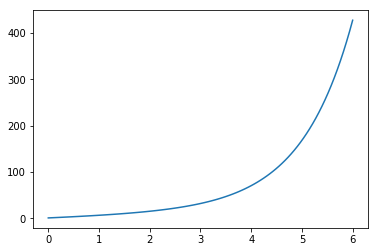

In [11]:
f = lambda x, y: x + y
F = lambda x: exp(x) + 4*x
analytic_f = F(1) - F(0)

euler_f = integral_euler(f, 0, 1, 0, n=100)
rungekutta2_f = integral_runge_kuta_order_2(f, 0, 1, 0, n=100, method=ralston)
rungekutta4_f = integral_runge_kuta_order_4(f, 0, 1, 0, n=100, method=ralston4order)

print('--- Exercicio 16 Derivação ---\n\n')
print('F(x) = e^x + 4 * x')
print('Intervalo = [0,1]\n')
print('Euler, 99 subintervalos:          {:.20f} - Erro absoluto: {:.10f}'.format(euler_f, abs(analytic_f - euler_f)))
print('Runge-Kutta 2, 99 subintervalos:  {:.20f} - Erro absoluto: {:.10f}'.format(rungekutta2_f, abs(analytic_f - rungekutta2_f)))
print('Runge-Kutta 4, 99 subintervalos:  {:.20f} - Erro absoluto: {:.10f}'.format(rungekutta4_f, abs(analytic_f - rungekutta4_f)))

        
xvals = np.linspace(0,6,100)
yvals = list(map(F, xvals))
plt.plot(xvals, yvals)
plt.show()

In [12]:
f = lambda x, y: x + y
F = lambda x: 12* math.cos(x)  - 0.1*x - x**3
analytic_f = F(1) - F(0)

rungekutta2_f = integral_runge_kuta_order_2(f, 0, 1, 0, n=100, method=ralston)

print('Runge-Kutta 2, 99 subintervalos:  {:.20f} - Erro absoluto: {:.10f}'.format(rungekutta2_f, abs(analytic_f - rungekutta2_f)))

Runge-Kutta 2, 99 subintervalos:  0.71794311544107036749 - Erro absoluto: 7.3343154450
